In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

sns.set(color_codes=True)
sns.set_context("paper",font_scale=2)
sns.set_style("white")


%matplotlib inline 

In [2]:
aptos = pd.read_csv('aptos.csv')

In [3]:
receitas = pd.read_csv('base_receitas_br.csv', sep='|')

In [30]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43813 entries, 0 to 43812
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    43813 non-null  int64  
 1   ANO_ELEICAO                   43813 non-null  int64  
 2   SG_UF                         43813 non-null  object 
 3   DS_CARGO                      43813 non-null  object 
 4   NM_CANDIDATO                  43813 non-null  object 
 5   SQ_CANDIDATO                  43813 non-null  int64  
 6   DS_SITUACAO_CANDIDATURA       43813 non-null  object 
 7   DS_DETALHE_SITUACAO_CAND      43813 non-null  object 
 8   NM_PARTIDO                    43813 non-null  object 
 9   NR_IDADE_DATA_POSSE           43813 non-null  int64  
 10  DS_GENERO                     43813 non-null  object 
 11  DS_GRAU_INSTRUCAO             43813 non-null  object 
 12  DS_COR_RACA                   43813 non-null  object 
 13  V

### Com Receita

In [7]:
dados = pd.merge(aptos, receitas, how = 'inner', on='SQ_CANDIDATO')

In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34213 entries, 0 to 34212
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    34213 non-null  int64  
 1   ANO_ELEICAO                   34213 non-null  int64  
 2   SG_UF                         34213 non-null  object 
 3   DS_CARGO                      34213 non-null  object 
 4   NM_CANDIDATO                  34213 non-null  object 
 5   SQ_CANDIDATO                  34213 non-null  int64  
 6   DS_SITUACAO_CANDIDATURA       34213 non-null  object 
 7   DS_DETALHE_SITUACAO_CAND      34213 non-null  object 
 8   NM_PARTIDO                    34213 non-null  object 
 9   NR_IDADE_DATA_POSSE           34213 non-null  int64  
 10  DS_GENERO                     34213 non-null  object 
 11  DS_GRAU_INSTRUCAO             34213 non-null  object 
 12  DS_COR_RACA                   34213 non-null  object 
 13  V

In [34]:
dados.to_csv('aptos_receita.csv')

In [2]:
dados = pd.read_csv('aptos_receita.csv')

In [61]:
# Há 4 candidaturas que não possui valor de despesas maxima de campanha
# Essas candidaturas possui algum tipo de fundo de receita declarado
sem_despesas = dados.loc[dados['VR_DESPESA_MAX_CAMPANHA'].isnull()]

In [258]:
sem_despesas.head()

Unnamed: 0  ANO_ELEICAO SG_UF       DS_CARGO  \
2217         3036         2020    PR  VICE-PREFEITO   
5037         7013         2020    RN  VICE-PREFEITO   
23968       33146         2020    PA  VICE-PREFEITO   
27058       37419         2020    GO  VICE-PREFEITO   

                           NM_CANDIDATO  SQ_CANDIDATO DS_SITUACAO_CANDIDATURA  \
2217                 JULIO CESAR DUARTE  160001196274                    APTO   
5037              SUERDA ALVES DA SILVA  200001060269                    APTO   
23968  JESSICA ANDREZA DE SOUZA ALMEIDA  140001124976                    APTO   
27058               HEITOR DIAS CAMARGO   90000680133                    APTO   

      DS_DETALHE_SITUACAO_CAND                           NM_PARTIDO  \
2217                  DEFERIDO                               AVANTE   
5037                  DEFERIDO                         REPUBLICANOS   
23968                 DEFERIDO               PARTIDO SOCIAL CRISTÃO   
27058                 DEFERIDO  PARTIDO REPUBLICANO DA ORDEM SOCIAL   

       NR_IDADE_DATA_POSSE  ... DS_SITUACAO_CANDIDATO_PLEITO  \
2217                    28  ...                     DEFERIDO   
5037                    28  ...                     DEFERIDO   
23968                   26  ...                     DEFERIDO   
27058                   27  ...                     DEFERIDO   

      DS_SITUACAO_CANDIDATO_URNA media_esp  soma_esp media_part soma_part  \
2217                    DEFERIDO       0.0       0.0        0.0       0.0   
5037                    DEFERIDO       0.0       0.0    10000.0   10000.0   
23968                   DEFERIDO   15000.0   15000.0        0.0       0.0   
27058                   DEFERIDO       0.0       0.0    11633.0   34899.0   

       media_out  soma_out  soma_media  soma_total  
2217       516.9    1550.7       516.9      1550.7  
5037         0.0       0.0     10000.0     10000.0  
23968        0.0       0.0     15000.0     15000.0  
27058        0.0       0.0     11633.0     34899.0  

[4 rows x 24 columns]

##### Análise Soma das médias dos 3 tipos de fundo de receitas: o partidário, o especial e outros

In [261]:
dados['soma_total'].describe()

count    3.421300e+04
mean     1.120442e+04
std      1.122970e+06
min      1.000000e-02
25%      5.000000e+02
50%      1.251530e+03
75%      3.045000e+03
max      2.071737e+08
Name: soma_total, dtype: float64

 - Idade

In [118]:
media1_idade = dados.filter(items=['soma_media']).where(dados['soma_media'] <= 1000).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [119]:
media2_idade = dados.filter(items=['soma_media']).where((dados['soma_media'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [120]:
media3_idade = dados.filter(items=['soma_media']).where((dados['soma_media'] > 20000)).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [121]:
media_idade = pd.DataFrame(media1_idade)

In [122]:
media_idade['1000 a 20000'] = media2_idade['soma_media']
media_idade['Maior que 20000'] = media3_idade['soma_media']


In [125]:
media_idade = media_idade.rename(columns={'soma_media' : 'Até 1000'})

In [162]:
media_idade

Até 1000  1000 a 20000  Maior que 20000
NR_IDADE_DATA_POSSE                                         
18                        345           121                3
19                        739           258                4
20                       1061           343                3
21                       1314           446               23
22                       1555           597                7
23                       1871           625               13
24                       2198           745               25
25                       2591           882               30
26                       2905          1049               33
27                       3115          1127               38
28                       3518          1225               58
29                       3817          1454               75

  - Distribuição Racial

In [127]:
media1_raca = dados.filter(items=['soma_media']).where(dados['soma_media'] <= 1000).groupby(dados['DS_COR_RACA']).count()

In [128]:
media2_raca = dados.filter(items=['soma_media']).where((dados['soma_media'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['DS_COR_RACA']).count()

In [129]:
media3_raca = dados.filter(items=['soma_media']).where((dados['soma_media'] > 20000)).groupby(dados['DS_COR_RACA']).count()

In [133]:
media_raca = pd.DataFrame(media1_raca)

In [134]:
media_raca['1000 a 20000'] = media2_raca['soma_media']
media_raca['Maior que 20000'] = media3_raca['soma_media']

In [135]:
media_raca = media_raca.rename(columns={'soma_media' : 'Até 1000'})

In [136]:
media_raca

Até 1000  1000 a 20000  Maior que 20000
DS_COR_RACA                                            
AMARELA              102            36                0
BRANCA             11973          3874              162
INDÍGENA             124            61                0
PARDA              10050          3800              123
PRETA               2502          1013               26
SEM INFORMAÇÃO       278            88                1

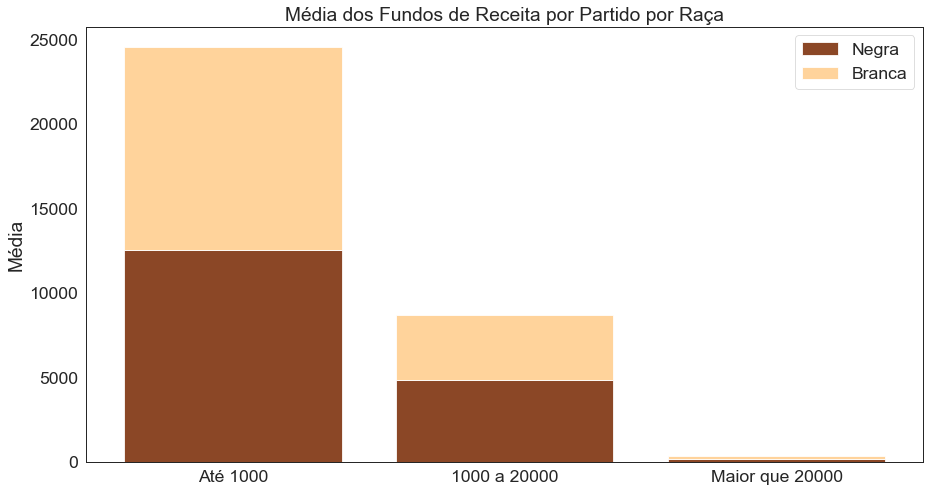

In [156]:
# Reperesentanto a distribuição racial, foi excluido os ignorados e amarelos pois estavam zerados
negro = np.array(( 12552, 4813, 149))
branco = np.array((11973,3874,162))

resources = ['Negra', 'Branca']

media = [ 'Até 1000', '1000 a 20000','Maior que 20000']

# Auemntando o grafico 
plt.figure(figsize=(15,8))

#Criando barras
plt.bar(renda, negro, color='#8B4726')
plt.bar(renda, branco, color='#FFD39B', bottom= negro)

# Adicionando legendas
plt.ylabel('Média')
plt.title('Média dos Fundos de Receita por Partido por Raça')
plt.legend(('Negra', 'Branca'))

#mostrando o gráfico
plt.show()

 - Distribuição de Gênero

In [137]:
media1_genero = dados.filter(items=['soma_media']).where(dados['soma_media'] <= 1000).groupby(dados['DS_GENERO']).count()

In [138]:
media2_gener = dados.filter(items=['soma_media']).where((dados['soma_media'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['DS_GENERO']).count()

In [139]:
media3_genero = dados.filter(items=['soma_media']).where((dados['soma_media'] > 20000)).groupby(dados['DS_GENERO']).count()

In [140]:
media_genero = pd.DataFrame(media1_genero)

In [141]:
media_genero['1000 a 20000'] = media2_gener['soma_media']
media_genero['Maior que 20000'] = media3_genero['soma_media']

In [142]:
media_genero = media_genero.rename(columns={'soma_media' : 'Até 1000'})

In [143]:
media_genero

Até 1000  1000 a 20000  Maior que 20000
DS_GENERO                                         
FEMININO      10145          3926              104
MASCULINO     14884          4946              208

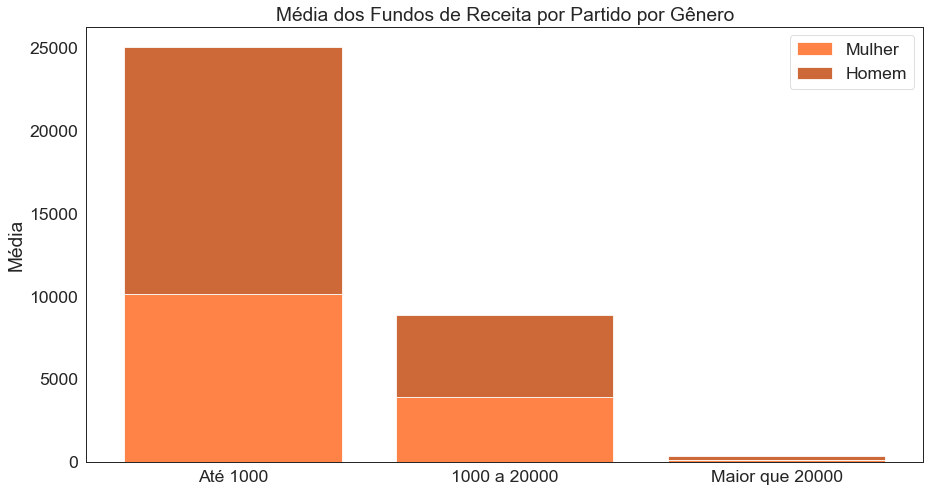

In [157]:
mulher = np.array((10145, 3926, 104))
homem = np.array((14884,4946,208))

resources = ['Mulher', 'Homem']

media = [ 'Até 1000', '1000 a 20000','Maior que 20000']

# Auemntando o grafico 
plt.figure(figsize=(15,8))

#Criando barras
plt.bar(renda, mulher, color='#FF8247')
plt.bar(renda, homem, color='#CD6839', bottom= mulher)

# Adicionando legendas
plt.ylabel('Média')
plt.title('Média dos Fundos de Receita por Partido por Gênero')
plt.legend(('Mulher', 'Homem'))

#mostrando o gráfico
plt.show()

 - Distribuição por Partido

In [103]:
renda1 = dados.filter(items=['soma_media']).where(dados['soma_media'] <= 1000).groupby(dados['NM_PARTIDO']).count()

In [104]:
renda2 = dados.filter(items=['soma_media']).where((dados['soma_media'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['NM_PARTIDO']).count()

In [105]:
renda3 = dados.filter(items=['soma_media']).where((dados['soma_media'] > 20000)).groupby(dados['NM_PARTIDO']).count()

In [106]:
renda_partido = pd.DataFrame(renda1)

In [107]:
renda_partido['1000 a 20000'] = renda2['soma_media']
renda_partido['Maior que 20000'] = renda3['soma_media']


In [108]:
renda_partido = renda_partido.rename(columns={'soma_media':'Até 1000'})

In [109]:
renda_partido.head()

Até 1000  1000 a 20000  Maior que 20000
NM_PARTIDO                                                               
AVANTE                                 738           126                4
CIDADANIA                              903           216               15
DEMOCRACIA CRISTÃ                      172            46                0
DEMOCRATAS                            1551           351               18
MOVIMENTO DEMOCRÁTICO BRASILEIRO      1854           754               29

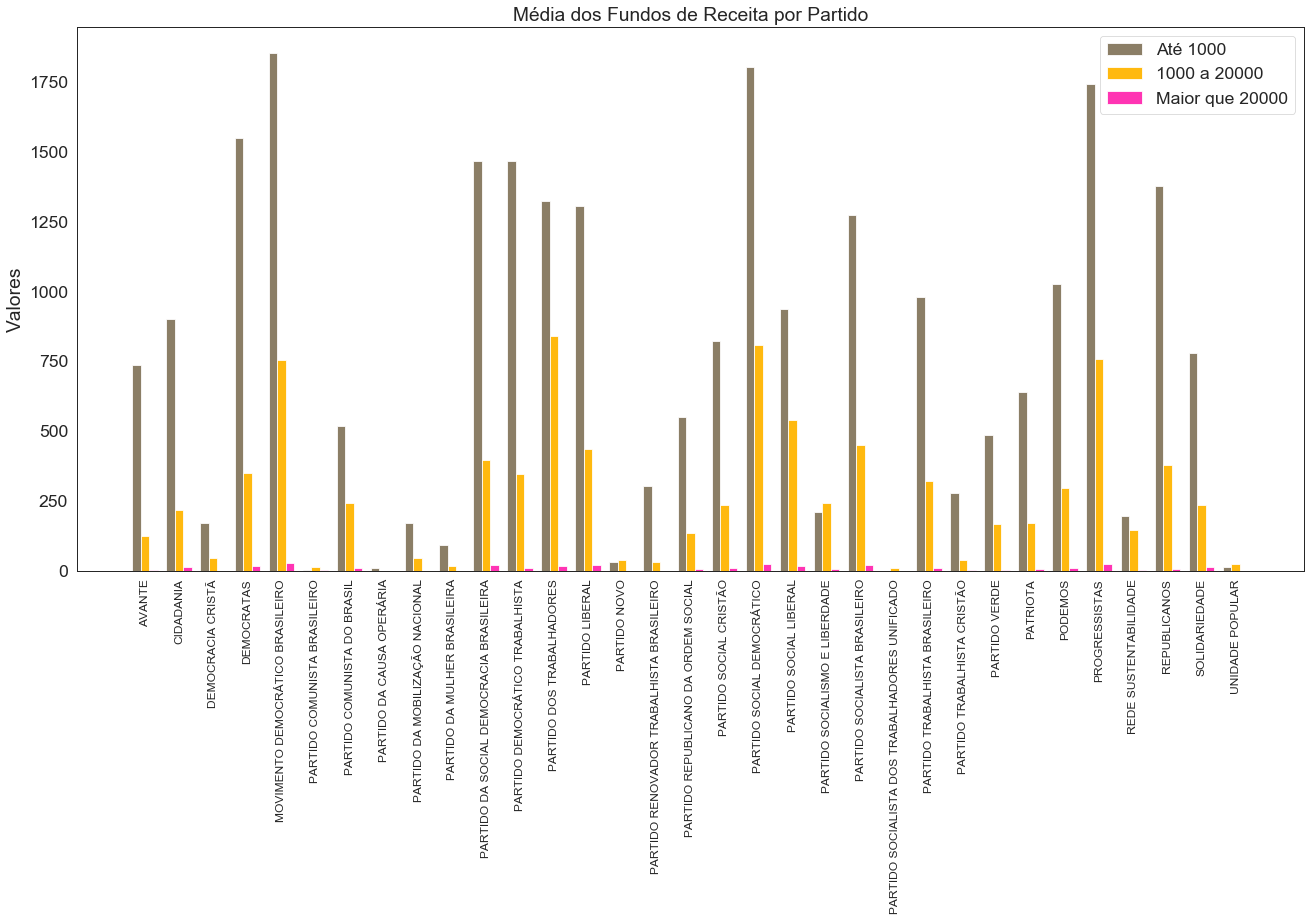

In [110]:
# renda 1 = Até 1000
# renda 2 = de 1000 a 20.000
# renda 3 = Maior que 20.000

renda_1 = renda_partido['Até 1000'].tolist()
renda_2 = renda_partido['1000 a 20000'].tolist()
renda_3 = renda_partido['Maior que 20000'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(22,10))

#definindo a posição
r1 = np.arange(len(renda_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Criando as barras 
plt.bar(r1, renda_1, color='#8B7E66', width=barWidth, label= 'Até 1000')
plt.bar(r2, renda_2, color='#FFB90F', width=barWidth, label= '1000 a 20000')
plt.bar(r3, renda_3, color='#FF34B3', width=barWidth, label= 'Maior que 20000')

# Adicionando legendas
plt.xticks([r + barWidth for r in range(len(renda_1))], renda1.index.tolist(), rotation=90, fontsize=12)
plt.ylabel('Valores')
plt.title('Média dos Fundos de Receita por Partido')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

  - Distribuição por UF

In [145]:
media1_uf = dados.filter(items=['soma_media']).where(dados['soma_media'] <= 1000).groupby(dados['SG_UF']).count()

In [146]:
media2_uf = dados.filter(items=['soma_media']).where((dados['soma_media'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['SG_UF']).count()

In [147]:
media3_uf = dados.filter(items=['soma_media']).where((dados['soma_media'] > 20000)).groupby(dados['SG_UF']).count()

In [149]:
media_uf = pd.DataFrame(media1_uf)

In [151]:
media_uf['1000 a 20000'] = media2_uf['soma_media']
media_uf['Maior que 20000'] = media3_uf['soma_media']

In [152]:
media_uf = media_uf.rename(columns={'soma_media' : 'Até 1000'})

In [153]:
media_uf

Até 1000  1000 a 20000  Maior que 20000
SG_UF                                         
AC          117           165                1
AL          265           164               16
AM          437           218                7
AP           64           124               10
BA         1829           380               12
CE          717           428               13
ES          496           154                3
GO         1295           482               13
MA          811           357               23
MG         4825           625               27
MS          255           233                9
MT          507           264                5
PA         1127           453               11
PB          671           284               15
PE          840           360               24
PI          344           557               11
PR         2023           448               14
RJ          735           312               11
RN          565           297               12
RO          191           200                6
RR           28           142                5
RS         1661           602                7
SC         1045           482                4
SE          381           156                4
SP         3313           724               41
TO          487           261                8

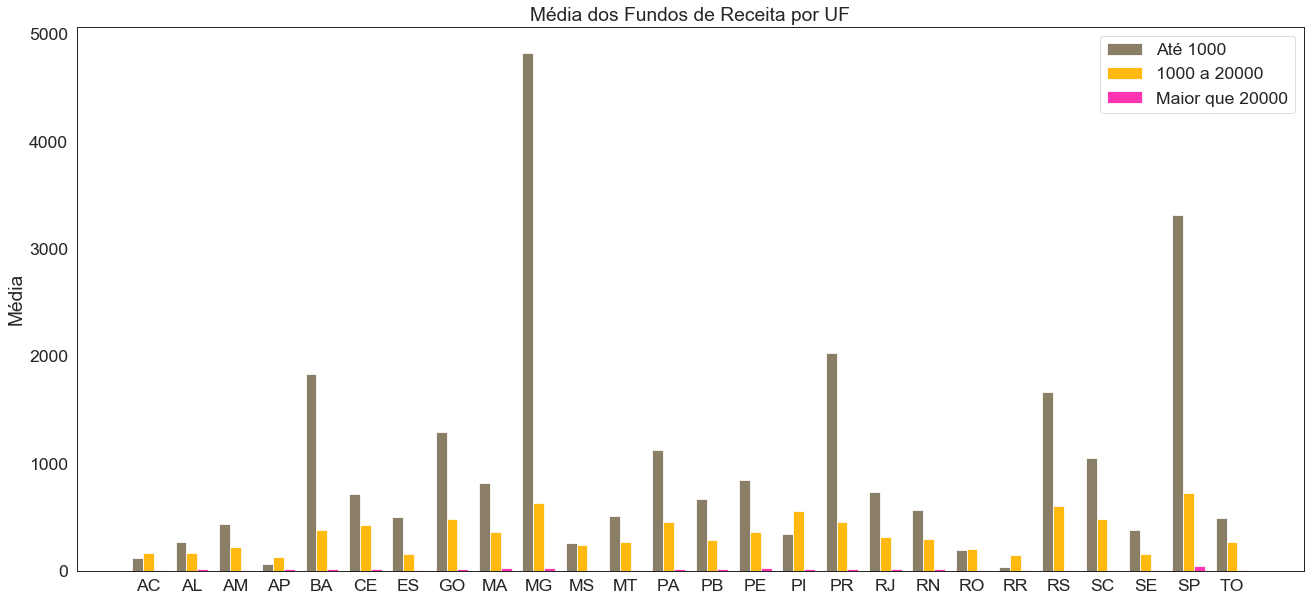

In [161]:
# media 1 = Até 1000
# media 2 = de 1000 a 20.000
# media 3 = Maior que 20.000

media_1 = media_uf['Até 1000'].tolist()
media_2 = media_uf['1000 a 20000'].tolist()
media_3 = media_uf['Maior que 20000'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(22,10))

#definindo a posição
r1 = np.arange(len(media_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Criando as barras 
plt.bar(r1, media_1, color='#8B7E66', width=barWidth, label= 'Até 1000')
plt.bar(r2, media_2, color='#FFB90F', width=barWidth, label= '1000 a 20000')
plt.bar(r3, media_3, color='#FF34B3', width=barWidth, label= 'Maior que 20000')

# Adicionando legendas
plt.xticks([r + barWidth for r in range(len(media_1))], media_uf.index.tolist())
plt.ylabel('Média')
plt.title('Média dos Fundos de Receita por UF')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

##### Análise Soma Total dos 3 tipos de fundo de receitas: o partidário, o especial e outros

In [267]:
dados['soma_total'].describe()

count    3.421300e+04
mean     1.120442e+04
std      1.122970e+06
min      1.000000e-02
25%      5.000000e+02
50%      1.251530e+03
75%      3.045000e+03
max      2.071737e+08
Name: soma_total, dtype: float64

In [33]:
dados['soma_part'].describe()

count     34213.000000
mean        142.936225
std        4522.475862
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      552079.180000
Name: soma_part, dtype: float64

In [34]:
dados['soma_esp'].describe()

count    3.421300e+04
mean     2.697422e+03
std      7.883908e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.890000e+02
max      9.905320e+06
Name: soma_esp, dtype: float64

In [35]:
dados['soma_out'].describe()

count    3.421300e+04
mean     8.364061e+03
std      1.120108e+06
min      0.000000e+00
25%      1.404500e+02
50%      6.050000e+02
75%      1.700980e+03
max      2.071737e+08
Name: soma_out, dtype: float64

 - Idade

In [170]:
media1_idade = dados.filter(items=['soma_total']).where(dados['soma_total'] <= 1000).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [171]:
media2_idade = dados.filter(items=['soma_total']).where((dados['soma_total'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [172]:
media3_idade = dados.filter(items=['soma_total']).where((dados['soma_total'] > 20000)).groupby(dados['NR_IDADE_DATA_POSSE']).count()

In [173]:
media_idade = pd.DataFrame(media1_idade)

In [175]:
media_idade['1000 a 20000'] = media2_idade['soma_total']
media_idade['Maior que 20000'] = media3_idade['soma_total']


In [176]:
media_idade = media_idade.rename(columns={'soma_total' : 'Até 1000'})

In [6]:
# Idade categorica com a média do total
# A média de 24 anos aumentou devido o outlier 
idade = pd.DataFrame(dados.filter(items=['soma_total']).groupby(dados['NR_IDADE_DATA_POSSE']).mean())

In [23]:
idade

soma_total  Idade
NR_IDADE_DATA_POSSE                     
18                    3007.515608     18
19                    3083.150210     19
20                    2551.071130     20
21                    3898.557633     21
22                    3155.399741     22
23                    3571.975735     23
24                   73820.829943     24
25                    4381.468164     25
26                    4721.194878     26
27                    8899.920570     27
28                    5631.978467     28
29                    6382.759241     29

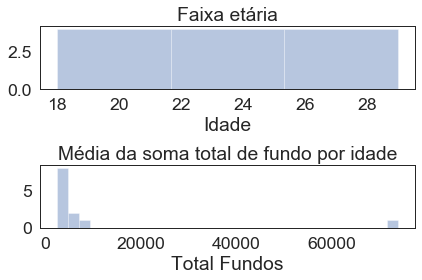

In [22]:
fig, axes = plt.subplots(2, 1)
sns.distplot(idade['Idade'], kde=False, ax=axes[0]);
axes[0].set_xlabel("Idade")
axes[0].set_title("Faixa etária")

sns.distplot(idade["soma_total"], kde=False, ax=axes[1]);
axes[1].set_xlabel("Total Fundos")
axes[1].set_title("Média da soma total de fundo por idade")

plt.tight_layout()

In [13]:
# fazer histograma de idade com soma total
idade = dados.filter(items=['soma_total']).groupby(dados['NR_IDADE_DATA_POSSE']).count()

ValueError: color kwarg must have one color per data set. 12 data sets and 1 colors were provided

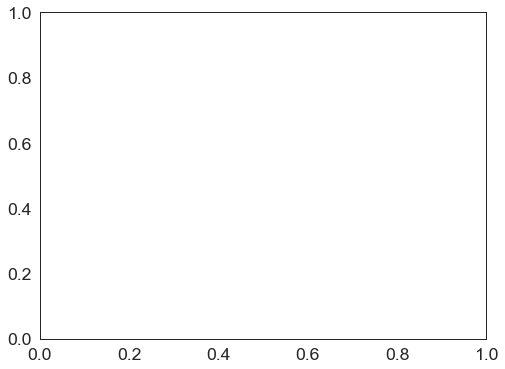

In [17]:
# Criando histograma

plt.figure(figsize=(8, 6))
plt.hist(idade, color= '#CD6839', density=False)
plt.title('Distribuição Etária dos Candidatos Inaptos')
plt.xlabel('Idade')
plt.ylabel('Candidatos')
plt.show()

  - Distribuição Racial

In [41]:
outliers = dados.loc[dados['soma_total'] > 1000000]

In [43]:
outliers['Unnamed: 0'].tolist()

[7592, 7593, 10253, 10912, 11671, 12665, 14006, 14007, 29290, 31597, 32487]

In [44]:
dados.drop([7592, 7593, 10253, 10912, 11671, 12665, 14006, 14007, 29290, 31597, 32487], axis=0, inplace=True)

In [24]:
dados2 = dados.loc[dados['soma_total'] <= 50000]

In [27]:
dados2.to_csv('aptos_receita2.csv')

In [29]:
dados3 = dados.loc[(dados['soma_total'] > 50000) & (dados['soma_total'] < 1000000)]

In [32]:
dados4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 7592 to 32487
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    11 non-null     int64  
 1   Unnamed: 0.1                  11 non-null     int64  
 2   ANO_ELEICAO                   11 non-null     int64  
 3   SG_UF                         11 non-null     object 
 4   DS_CARGO                      11 non-null     object 
 5   NM_CANDIDATO                  11 non-null     object 
 6   SQ_CANDIDATO                  11 non-null     int64  
 7   DS_SITUACAO_CANDIDATURA       11 non-null     object 
 8   DS_DETALHE_SITUACAO_CAND      11 non-null     object 
 9   NM_PARTIDO                    11 non-null     object 
 10  NR_IDADE_DATA_POSSE           11 non-null     int64  
 11  DS_GENERO                     11 non-null     object 
 12  DS_GRAU_INSTRUCAO             11 non-null     object 
 13  D

In [31]:
dados4 = dados.loc[(dados['soma_total'] > 1000000)]

In [26]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33816 entries, 0 to 34212
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    33816 non-null  int64  
 1   Unnamed: 0.1                  33816 non-null  int64  
 2   ANO_ELEICAO                   33816 non-null  int64  
 3   SG_UF                         33816 non-null  object 
 4   DS_CARGO                      33816 non-null  object 
 5   NM_CANDIDATO                  33816 non-null  object 
 6   SQ_CANDIDATO                  33816 non-null  int64  
 7   DS_SITUACAO_CANDIDATURA       33816 non-null  object 
 8   DS_DETALHE_SITUACAO_CAND      33816 non-null  object 
 9   NM_PARTIDO                    33816 non-null  object 
 10  NR_IDADE_DATA_POSSE           33816 non-null  int64  
 11  DS_GENERO                     33816 non-null  object 
 12  DS_GRAU_INSTRUCAO             33816 non-null  object 
 13  D

In [78]:
fig = px.box(dados2, y='soma_total')
fig.show()

In [68]:
y0 = dados2['soma_total']
y1 = dados3['soma_total']
y2 = dados4['soma_total']


fig = go.Figure()
fig.add_trace(go.Box(y=y0, name='Até 50000',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=y1, name = '50000 a 1000000',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=y2, name = 'Mais que 1000000',
                marker_color = 'red'))

fig.show()

In [263]:
dados.filter(items=['soma_total']).groupby(dados['DS_COR_RACA']).describe()

soma_total                                             \
                    count          mean           std    min     25%   
DS_COR_RACA                                                            
AMARELA             138.0   2929.281014  5.096668e+03  14.00  433.50   
BRANCA            16009.0  19507.496114  1.641543e+06   1.97  512.85   
INDÍGENA            185.0   3580.104595  7.777067e+03  18.42  645.55   
PARDA             13973.0   3870.594620  1.759131e+04   0.01  500.00   
PRETA              3541.0   4241.919732  1.521719e+04   1.00  447.68   
SEM INFORMAÇÃO      367.0   2371.244305  5.556950e+03   0.70  494.50   

                                                  
                     50%       75%           max  
DS_COR_RACA                                       
AMARELA         1420.055  3267.300  4.576600e+04  
BRANCA          1270.000  3070.000  2.071737e+08  
INDÍGENA        1500.000  3435.000  8.644032e+04  
PARDA           1262.000  3047.000  1.190240e+06  
PRETA           1180.000  3000.000  3.550060e+05  
SEM INFORMAÇÃO  1055.000  2276.895  6.620250e+04

In [179]:
media2_raca = dados.filter(items=['soma_total']).where((dados['soma_total'] > 1000) & (dados['soma_media'] <= 20000)).groupby(dados['DS_COR_RACA']).count()

In [180]:
media3_raca = dados.filter(items=['soma_total']).where((dados['soma_total'] > 20000)).groupby(dados['DS_COR_RACA']).count()

In [181]:
media_raca = pd.DataFrame(media1_raca)

In [182]:
media_raca['1000 a 20000'] = media2_raca['soma_total']
media_raca['Maior que 20000'] = media3_raca['soma_total']

In [183]:
media_raca = media_raca.rename(columns={'soma_total' : 'Até 1000'})

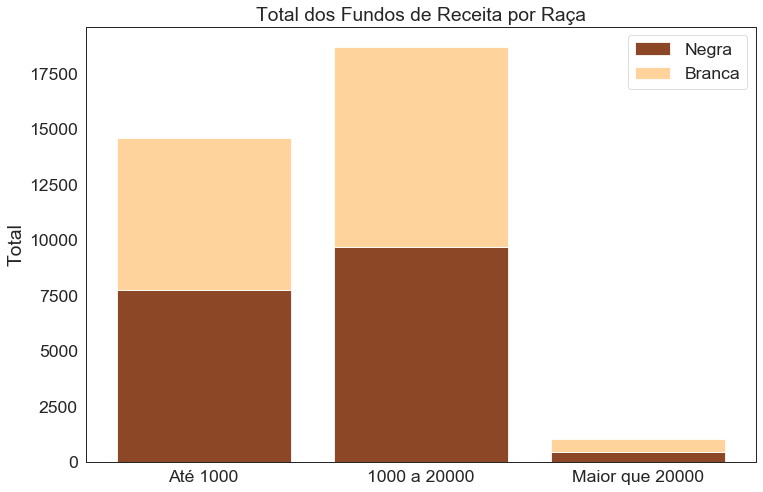

In [187]:
# Reperesentanto a distribuição racial, foi excluido os ignorados e amarelos pois estavam zerados
negro = np.array(( 7724, 9641, 446))
branco = np.array((6831,9016,547))

resources = ['Negra', 'Branca']

total = [ 'Até 1000', '1000 a 20000','Maior que 20000']

# Auemntando o grafico 
plt.figure(figsize=(12,8))

#Criando barras
plt.bar(total, negro, color='#8B4726')
plt.bar(total, branco, color='#FFD39B', bottom= negro)

# Adicionando legendas
plt.ylabel('Total')
plt.title('Total dos Fundos de Receita por Raça')
plt.legend(('Negra', 'Branca'))

#mostrando o gráfico
plt.show()

 - Distribuição de Gênero
 


In [25]:
fig = px.box(dados,x= 'DS_GENERO', y='soma_total')
fig.show()

In [277]:
dados.filter(items=['soma_out']).groupby(dados['DS_GENERO']).describe()

soma_out                                                           \
             count          mean           std  min    25%      50%     75%   
DS_GENERO                                                                     
FEMININO   14175.0  16073.204727  1.740108e+06  0.0   62.0  420.000  1200.0   
MASCULINO  20038.0   2910.566257  1.383506e+04  0.0  200.0  797.465  2100.0   

                         
                    max  
DS_GENERO                
FEMININO   2.071737e+08  
MASCULINO  4.916103e+05

In [274]:
dados['soma_part'].describe()

count     34213.000000
mean        142.936225
std        4522.475862
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      552079.180000
Name: soma_part, dtype: float64

In [273]:
dados.loc[dados['soma_part'] == 207173746.66].transpose()

12665
Unnamed: 0                                          17480
ANO_ELEICAO                                          2020
SG_UF                                                  AM
DS_CARGO                                         VEREADOR
NM_CANDIDATO                  JESSICA CONEGUNDES DA SILVA
SQ_CANDIDATO                                  40000832036
DS_SITUACAO_CANDIDATURA                              APTO
DS_DETALHE_SITUACAO_CAND                         DEFERIDO
NM_PARTIDO                                   REPUBLICANOS
NR_IDADE_DATA_POSSE                                    24
DS_GENERO                                        FEMININO
DS_GRAU_INSTRUCAO                   ENSINO MÉDIO COMPLETO
DS_COR_RACA                                        BRANCA
VR_DESPESA_MAX_CAMPANHA                             18065
DS_SITUACAO_CANDIDATO_PLEITO                     DEFERIDO
DS_SITUACAO_CANDIDATO_URNA                       DEFERIDO
media_esp                                               0
soma_esp                                                0
media_part                                              0
soma_part                                               0
media_out                                     2.30193e+07
soma_out                                      2.07174e+08
soma_media                                    2.30193e+07
soma_total                                    2.07174e+08

In [225]:
total1_genero = dados.filter(items=['soma_total']).where(dados['soma_total'] <= 1000).groupby(dados['DS_GENERO']).count()

In [226]:
total2_gener = dados.filter(items=['soma_total']).where((dados['soma_total'] > 1000) & (dados['soma_total'] <= 20000)).groupby(dados['DS_GENERO']).count()

In [227]:
total3_genero = dados.filter(items=['soma_total']).where((dados['soma_total'] > 20000)).groupby(dados['DS_GENERO']).count()

In [228]:
total_genero = pd.DataFrame(total1_genero)

In [229]:
total_genero['1000 a 20000'] = total2_gener['soma_total']
total_genero['Maior que 20000'] = total3_genero['soma_total']

In [230]:
total_genero = total_genero.rename(columns={'soma_total': 'Até 1000'})

In [231]:
total_genero

Até 1000  1000 a 20000  Maior que 20000
DS_GENERO                                         
FEMININO       6582          7302              291
MASCULINO      8283         11039              716

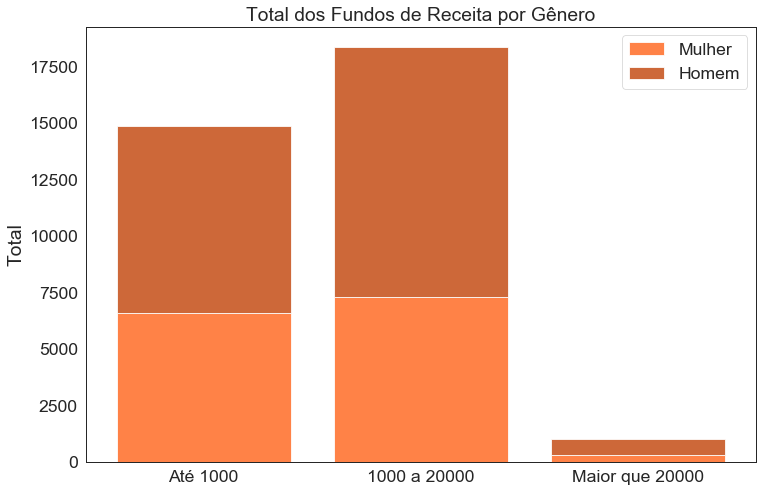

In [232]:
mulher = np.array((6582, 7302, 291))
homem = np.array((8283,11039,716))

resources = ['Mulher', 'Homem']

total = [ 'Até 1000', '1000 a 20000','Maior que 20000']

# Auemntando o grafico 
plt.figure(figsize=(12,8))

#Criando barras
plt.bar(total, mulher, color='#FF8247')
plt.bar(total, homem, color='#CD6839', bottom= mulher)

# Adicionando legendas
plt.ylabel('Total')
plt.title('Total dos Fundos de Receita por Gênero')
plt.legend(('Mulher', 'Homem'))

#mostrando o gráfico
plt.show()

 - Distribuição por Partido
 
 1. fazer um boxplot para cada partido

In [26]:
fig = px.box(dados,x= 'NM_PARTIDO', y='soma_total')
fig.show()

In [279]:
dados.filter(items=['soma_total']).groupby(dados['NM_PARTIDO']).describe()

soma_total                 \
                                                    count           mean   
NM_PARTIDO                                                                 
AVANTE                                              868.0    2260.266429   
CIDADANIA                                          1134.0    8162.019136   
DEMOCRACIA CRISTÃ                                   218.0    3130.638257   
DEMOCRATAS                                         1920.0    3953.627656   
MOVIMENTO DEMOCRÁTICO BRASILEIRO                   2637.0    4521.235556   
PARTIDO COMUNISTA BRASILEIRO                         20.0   21167.579500   
PARTIDO COMUNISTA DO BRASIL                         771.0    4324.410415   
PARTIDO DA CAUSA OPERÁRIA                            10.0    1000.000000   
PARTIDO DA MOBILIZAÇÃO NACIONAL                     219.0    1959.684338   
PARTIDO DA MULHER BRASILEIRA                        110.0    1404.037909   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA            1886.0    5051.724629   
PARTIDO DEMOCRÁTICO TRABALHISTA                    1828.0    4076.712817   
PARTIDO DOS TRABALHADORES                          2181.0    4633.575277   
PARTIDO LIBERAL                                    1763.0    4002.266364   
PARTIDO NOVO                                         69.0   44598.602754   
PARTIDO RENOVADOR TRABALHISTA BRASILEIRO            335.0    3686.970179   
PARTIDO REPUBLICANO DA ORDEM SOCIAL                 694.0    4018.517983   
PARTIDO SOCIAL CRISTÃO                             1064.0    4037.172998   
PARTIDO SOCIAL DEMOCRÁTICO                         2638.0    4163.470102   
PARTIDO SOCIAL LIBERAL                             1494.0    6745.053561   
PARTIDO SOCIALISMO E LIBERDADE                      458.0    8527.487533   
PARTIDO SOCIALISTA BRASILEIRO                      1747.0   15676.349422   
PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO        9.0   10560.638889   
PARTIDO TRABALHISTA BRASILEIRO                     1312.0    4600.550915   
PARTIDO TRABALHISTA CRISTÃO                         318.0    2831.011447   
PARTIDO VERDE                                       654.0    2675.599602   
PATRIOTA                                            818.0    3486.314401   
PODEMOS                                            1335.0    4972.648764   
PROGRESSISTAS                                      2523.0    4504.014883   
REDE SUSTENTABILIDADE                               345.0    6895.379072   
REPUBLICANOS                                       1766.0  120606.618618   
SOLIDARIEDADE                                      1032.0    4182.740727   
UNIDADE POPULAR                                      37.0    9712.357027   

                                                                       \
                                                         std      min   
NM_PARTIDO                                                              
AVANTE                                          5.917866e+03     9.50   
CIDADANIA                                       6.998969e+04    13.00   
DEMOCRACIA CRISTÃ                               7.100492e+03    17.12   
DEMOCRATAS                                      1.831110e+04     9.30   
MOVIMENTO DEMOCRÁTICO BRASILEIRO                1.418301e+04     9.30   
PARTIDO COMUNISTA BRASILEIRO                    2.264679e+04  3000.00   
PARTIDO COMUNISTA DO BRASIL                     1.676836e+04     7.50   
PARTIDO DA CAUSA OPERÁRIA                       0.000000e+00  1000.00   
PARTIDO DA MOBILIZAÇÃO NACIONAL                 4.339038e+03    14.00   
PARTIDO DA MULHER BRASILEIRA                    2.027067e+03    14.00   
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA         3.457097e+04     4.95   
PARTIDO DEMOCRÁTICO TRABALHISTA                 3.046396e+04     0.70   
PARTIDO DOS TRABALHADORES                       1.546629e+04    14.00   
PARTIDO LIBERAL                                 1.323394e+04     1.00   
PARTIDO NOVO                                    8.581686e+04  1685.24

In [198]:
renda1 = dados.filter(items=['soma_total']).where(dados['soma_total'] <= 1000).groupby(dados['NM_PARTIDO']).count()

In [199]:
renda2 = dados.filter(items=['soma_total']).where((dados['soma_total'] > 1000) & (dados['soma_total'] <= 20000)).groupby(dados['NM_PARTIDO']).count()

In [200]:
renda3 = dados.filter(items=['soma_total']).where((dados['soma_total'] > 20000)).groupby(dados['NM_PARTIDO']).count()

In [201]:
renda_partido = pd.DataFrame(renda1)

In [202]:
renda_partido['1000 a 20000'] = renda2['soma_total']
renda_partido['Maior que 20000'] = renda3['soma_total']


In [203]:
renda_partido = renda_partido.rename(columns={'soma_total':'Até 1000'})

In [109]:
renda_partido.head()

Até 1000  1000 a 20000  Maior que 20000
NM_PARTIDO                                                               
AVANTE                                 738           126                4
CIDADANIA                              903           216               15
DEMOCRACIA CRISTÃ                      172            46                0
DEMOCRATAS                            1551           351               18
MOVIMENTO DEMOCRÁTICO BRASILEIRO      1854           754               29

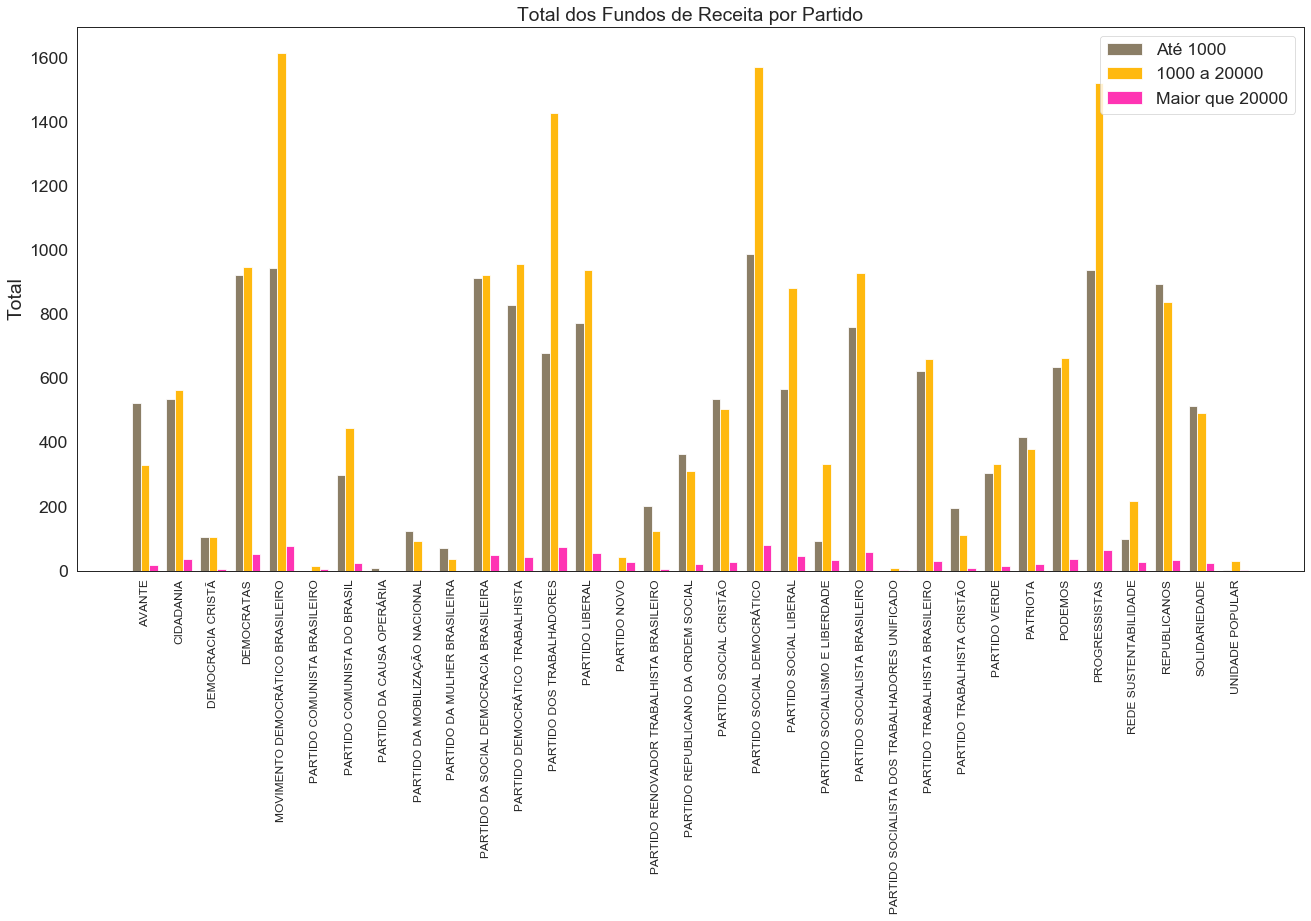

In [204]:
# total 1 = Até 1000
# total 2 = de 1000 a 20.000
# total 3 = Maior que 20.000

total_1 = renda_partido['Até 1000'].tolist()
total_2 = renda_partido['1000 a 20000'].tolist()
total_3 = renda_partido['Maior que 20000'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(22,10))

#definindo a posição
r1 = np.arange(len(renda_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Criando as barras 
plt.bar(r1, total_1, color='#8B7E66', width=barWidth, label= 'Até 1000')
plt.bar(r2, total_2, color='#FFB90F', width=barWidth, label= '1000 a 20000')
plt.bar(r3, total_3, color='#FF34B3', width=barWidth, label= 'Maior que 20000')

# Adicionando legendas
plt.xticks([r + barWidth for r in range(len(total_1))], renda_partido.index.tolist(), rotation=90, fontsize=12)
plt.ylabel('Total')
plt.title('Total dos Fundos de Receita por Partido')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

  - Distribuição por UF
  1. boxplot

In [27]:
fig = px.box(dados,x= 'SG_UF', y='soma_total')
fig.show()

In [216]:
total1_uf = dados.filter(items=['soma_total']).where(dados['soma_total'] <= 1000).groupby(dados['SG_UF']).count()

In [217]:
total2_uf = dados.filter(items=['soma_total']).where((dados['soma_total'] > 1000) & (dados['soma_total'] <= 20000)).groupby(dados['SG_UF']).count()

In [218]:
total3_uf = dados.filter(items=['soma_total']).where((dados['soma_total'] > 20000)).groupby(dados['SG_UF']).count()

In [219]:
total_uf = pd.DataFrame(total1_uf)

In [221]:
total_uf['1000 a 20000'] = total2_uf['soma_total']
total_uf['Maior que 20000'] = total3_uf['soma_total']

In [222]:
total_uf = total_uf.rename(columns={'soma_total' : 'Até 1000'})

In [223]:
total_uf

Até 1000  1000 a 20000  Maior que 20000
SG_UF                                         
AC           50           216               17
AL          166           253               26
AM          301           338               23
AP           35           138               25
BA         1195           997               29
CE          378           737               43
ES          287           347               19
GO          541          1202               47
MA          489           659               43
MG         3257          2129               91
MS          133           340               24
MT          162           590               24
PA          698           859               34
PB          413           526               31
PE          567           612               45
PI          150           724               38
PR         1113          1321               51
RJ          455           539               64
RN          318           520               36
RO           93           281               23
RR            8           145               22
RS          785          1444               41
SC          462          1026               43
SE          227           301               13
SP         2369          1574              135
TO          213           523               20

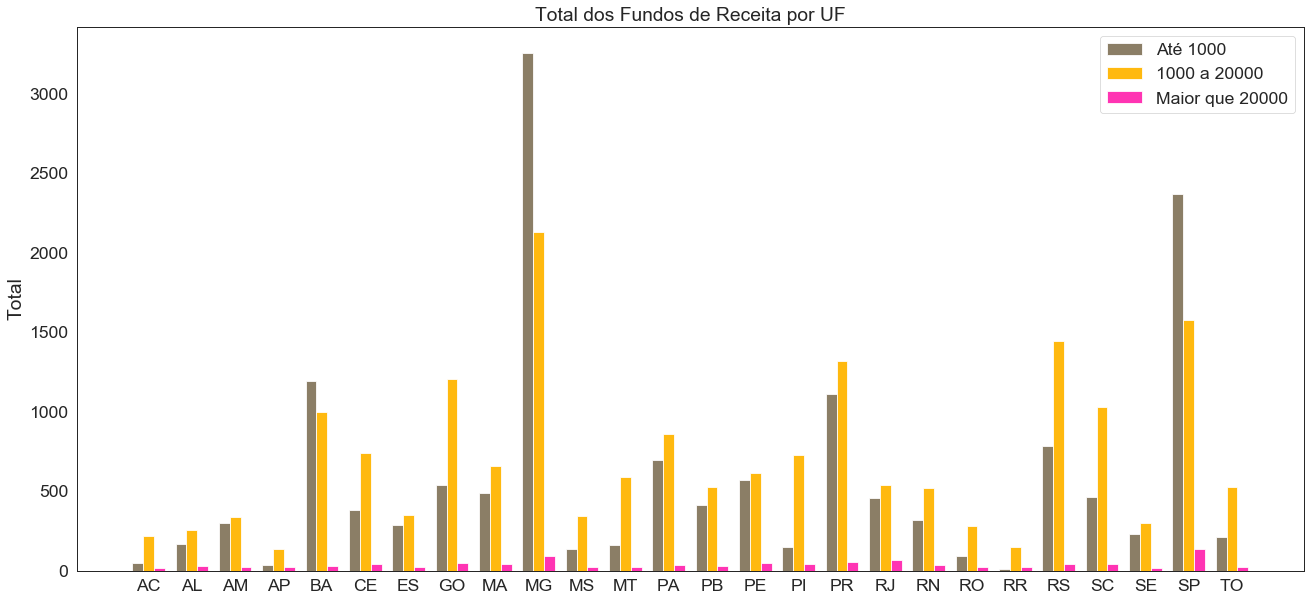

In [224]:
# total 1 = Até 1000
# total 2 = de 1000 a 20.000
# total 3 = Maior que 20.000

total_1 = total_uf['Até 1000'].tolist()
total_2 = total_uf['1000 a 20000'].tolist()
total_3 = total_uf['Maior que 20000'].tolist()

#definindo a largura da barra
barWidth = 0.25

#aumentando o gráfico 
plt.figure(figsize=(22,10))

#definindo a posição
r1 = np.arange(len(total_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


# Criando as barras 
plt.bar(r1, total_1, color='#8B7E66', width=barWidth, label= 'Até 1000')
plt.bar(r2, total_2, color='#FFB90F', width=barWidth, label= '1000 a 20000')
plt.bar(r3, total_3, color='#FF34B3', width=barWidth, label= 'Maior que 20000')

# Adicionando legendas
plt.xticks([r + barWidth for r in range(len(total_1))], total_uf.index.tolist())
plt.ylabel('Total')
plt.title('Total dos Fundos de Receita por UF')

# Criando legenda e mostrando o gráfico
plt.legend()
plt.show()

### Sem Receita

In [41]:
dados2 = pd.merge(aptos, dados, how = 'outer')

In [45]:
sem_receita = dados2.loc[dados2['media_esp'].isnull()]

In [234]:
sem_receita.columns

Index(['Unnamed: 0', 'ANO_ELEICAO', 'SG_UF', 'DS_CARGO', 'NM_CANDIDATO',
       'SQ_CANDIDATO', 'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND',
       'NM_PARTIDO', 'NR_IDADE_DATA_POSSE', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
       'DS_COR_RACA', 'VR_DESPESA_MAX_CAMPANHA',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'DS_SITUACAO_CANDIDATO_URNA',
       'media_esp', 'soma_esp', 'media_part', 'soma_part', 'media_out',
       'soma_out', 'soma_media', 'soma_total'],
      dtype='object')

In [237]:
sem_receita['NR_IDADE_DATA_POSSE'].value_counts()

29    1430
28    1326
27    1140
26    1111
25    1021
24     806
23     744
22     638
21     553
20     417
19     291
18     123
Name: NR_IDADE_DATA_POSSE, dtype: int64

In [235]:
sem_receita['DS_GENERO'].value_counts()

MASCULINO    5149
FEMININO     4451
Name: DS_GENERO, dtype: int64

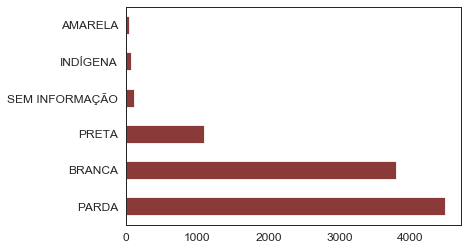

In [257]:
sem_receita['DS_COR_RACA'].value_counts().plot(kind='barh', color='#8B3A3A', fontsize=12)

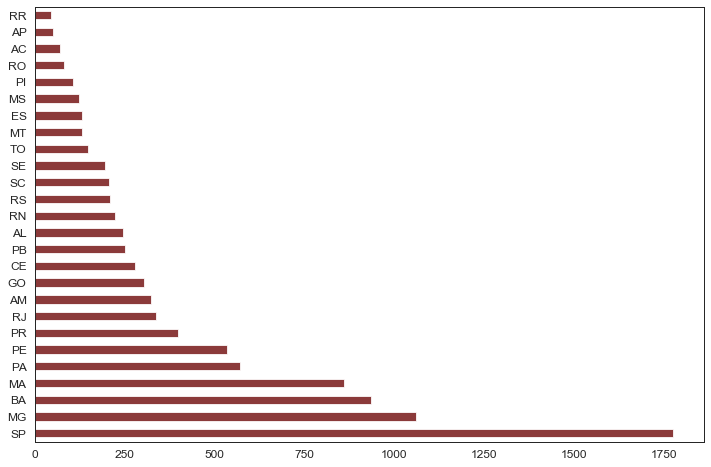

In [241]:
sem_receita['SG_UF'].value_counts().plot(kind='barh', color='#8B3A3A', fontsize=12, figsize=(12,8))

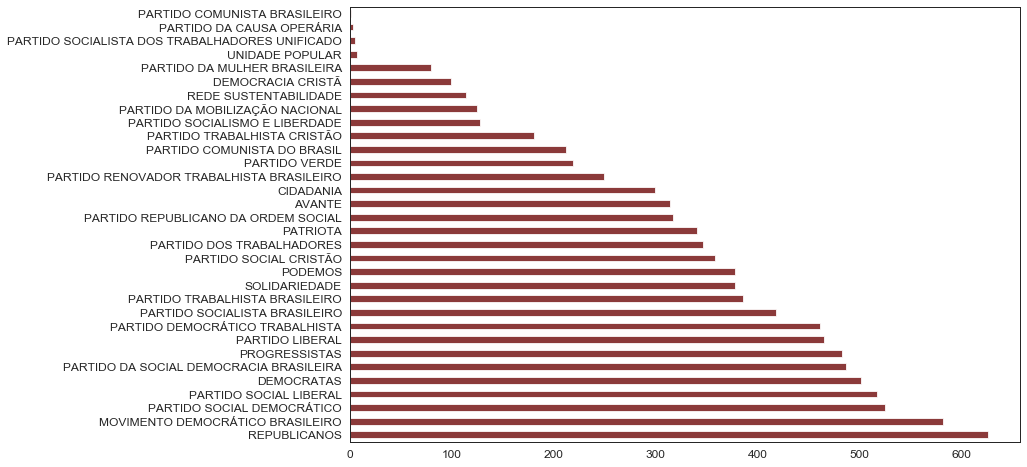

In [242]:
sem_receita['NM_PARTIDO'].value_counts().plot(kind='barh', color='#8B3A3A', fontsize=12, figsize=(12,8))

In [243]:
# Há 773 canditatos aptos que não declarou receita e nem despesas
sem_receita.loc[sem_receita['VR_DESPESA_MAX_CAMPANHA'].isnull()]

Unnamed: 0  ANO_ELEICAO SG_UF       DS_CARGO  \
45             45         2020    SP  VICE-PREFEITO   
53             53         2020    PR  VICE-PREFEITO   
83             83         2020    PE  VICE-PREFEITO   
201           205         2020    PR  VICE-PREFEITO   
257           270         2020    PI  VICE-PREFEITO   
...           ...          ...   ...            ...   
43730       37061         2020    PE  VICE-PREFEITO   
43764       43788         2020    MG  VICE-PREFEITO   
43772       45364         2020    MA  VICE-PREFEITO   
43775       46378         2020    TO  VICE-PREFEITO   
43791       14501         2020    AL  VICE-PREFEITO   

                                   NM_CANDIDATO  SQ_CANDIDATO  \
45            MARCOS VINICIUS FRANQUEIRA GARCIA  250001017616   
53               ALEX SANDRO APARECIDO DA SILVA  160001127089   
83               ROBERTA MARACAJÁ CAMPOS FERRAZ  170000945339   
201                       AMANDA LOPES DA SILVA  160001213230   
257                     LEONARDO DE SOUSA ROCHA  180000830783   
...                                         ...           ...   
43730  BÁRBARA LOUÍSY MACIEL CINTRA DE OLIVEIRA  170001134623   
43764             PAULO HENRIQUE PINTO MONTEIRO  130000918604   
43772                    KARINA MAGALHAES SOUSA  100000675523   
43775                     LUCAS SILVA GUIMARÃES  270000856761   
43791                     JACKSON GAMA DA SILVA   20001265450   

      DS_SITUACAO_CANDIDATURA DS_DETALHE_SITUACAO_CAND  \
45                       APTO                 DEFERIDO   
53                       APTO                 DEFERIDO   
83                       APTO                 DEFERIDO   
201                      APTO                 DEFERIDO   
257                      APTO                 DEFERIDO   
...                       ...                      ...   
43730                    APTO                 DEFERIDO   
43764                    APTO                 DEFERIDO   
43772                    APTO                 DEFERIDO   
43775                    APTO                 DEFERIDO   
43791                    APTO     DEFERIDO COM RECURSO   

                                    NM_PARTIDO  NR_IDADE_DATA_POSSE  ...  \
45                  PARTIDO SOCIAL DEMOCRÁTICO                   27  ...   
53                                     PODEMOS                   25  ...   
83              PARTIDO SOCIALISMO E LIBERDADE                   26  ...   
201            PARTIDO DEMOCRÁTICO TRABALHISTA                   28  ...   
257              PARTIDO SOCIALISTA BRASILEIRO                   29  ...   
...                                        ...                  ...  ...   
43730                   PARTIDO SOCIAL CRISTÃO                   23  ...   
43764            PARTIDO SOCIALISTA BRASILEIRO                   27  ...   
43772  PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA                   21  ...   
43775           PARTIDO TRABALHISTA BRASILEIRO                   23  ...   
43791          PARTIDO DA MOBILIZAÇÃO NACIONAL                   25  ...   

      DS_SITUACAO_CANDIDATO_PLEITO DS_SITUACAO_CANDIDATO_URNA media_esp  \
45                        DEFERIDO                   DEFERIDO       NaN   
53                        DEFERIDO                   DEFERIDO       NaN   
83                        DEFERIDO                   DEFERIDO       NaN   
201                       DEFERIDO                   DEFERIDO       NaN   
257                       DEFERIDO                   DEFERIDO       NaN   
...                            ...                        ...       ...   
43730                     DEFERIDO       DEFERIDO COM RECURSO       NaN   
43764         DEFERIDO COM RECURSO       DEFERIDO COM RECURSO       NaN   
43772                     DEFERIDO       DEFERIDO COM RECURSO       NaN   
43775                     DEFERIDO       DEFERIDO COM RECURSO       NaN   
43791         DEFERIDO COM RECURSO       DEFERIDO COM RECURSO       NaN   

       soma_esp media_part soma_part  media_out  soma_

In [244]:
sem_receita['VR_DESPESA_MAX_CAMPANHA'].value_counts()

12307.75     3747
140100.92      26
22512.92       23
83396.64       20
29929.30       20
             ... 
22336.17        1
37625.05        1
16453.79        1
17102.40        1
19522.82        1
Name: VR_DESPESA_MAX_CAMPANHA, Length: 1231, dtype: int64

In [245]:
# Despesas menos que 50.000 reais
sem_receita1 = sem_receita.loc[sem_receita['VR_DESPESA_MAX_CAMPANHA'] <= 50000]

In [246]:
sem_receita2 = sem_receita.loc[(sem_receita['VR_DESPESA_MAX_CAMPANHA'] >  50000) & (sem_receita['VR_DESPESA_MAX_CAMPANHA'] <  100000)]

In [247]:
#despesas entre 100.000 e 500.000 reais
sem_receita3 = sem_receita.loc[(sem_receita['VR_DESPESA_MAX_CAMPANHA'] >=  100000) & (sem_receita['VR_DESPESA_MAX_CAMPANHA'] <  500000)]

In [248]:
#despesas maior ou igual a 500.000 reais
sem_receita4 = sem_receita.loc[sem_receita['VR_DESPESA_MAX_CAMPANHA'] >= 500000]

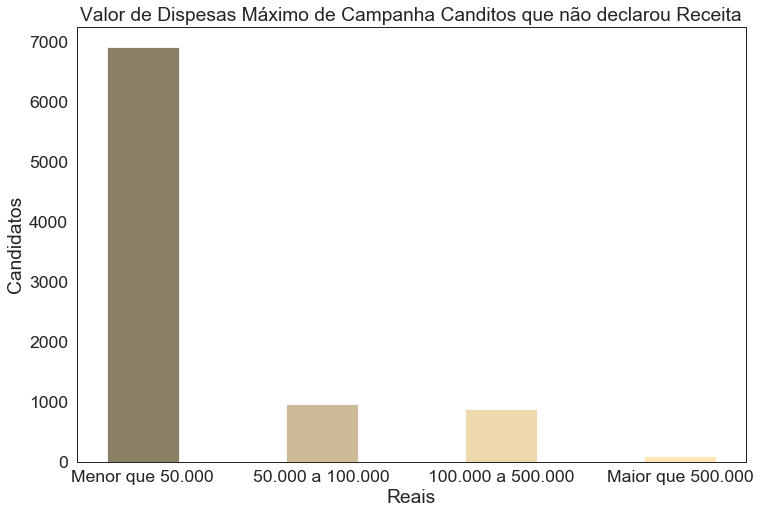

In [255]:
despesa_1 = 6901
despesa_2 = 951
despesa_3 = 880
despesa_4 = 95

#definindo a largura da barra
barWidth = 0.4

#aumentando o gráfico 
plt.figure(figsize=(12,8))



# Criando as barras 
plt.bar('Menor que 50.000', despesa_1, color='#8B7E66', width=barWidth, align='center')
plt.bar('50.000 a 100.000',despesa_2, color='#CDBA96', width=barWidth, align='center')
plt.bar('100.000 a 500.000',despesa_3, color='#EED8AE', width=barWidth, align='center')
plt.bar('Maior que 500.000',despesa_4, color='#FFE7BA', width=barWidth, align='center')

# Adicionando legendas
plt.xlabel('Reais')
plt.ylabel('Candidatos')
plt.title('Valor de Dispesas Máximo de Campanha Canditos que não declarou Receita')

# Criando legenda e mostrando o gráfico
plt.show()